# Analysis of ROIs for the MathLang Paradigm

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

### import the data

In [3]:
matrix_ROIs = pd.read_csv("../results/matrix_sentencesXROIs.csv")
matrix_ROIs.head()

,Frontal Pole,Insular Cortex,Superior Frontal Gyrus,Middle Frontal Gyrus,"Inferior Frontal Gyrus, pars triangularis","Inferior Frontal Gyrus, pars opercularis",Precentral Gyrus,Temporal Pole,"Superior Temporal Gyrus, anterior division","Superior Temporal Gyrus, posterior division",...,Temporal Occipital Fusiform Cortex,Occipital Fusiform Gyrus,Frontal Operculum Cortex,Central Opercular Cortex,Parietal Operculum Cortex,Planum Polare,Heschl's Gyrus (includes H1 and H2),Planum Temporale,Supracalcarine Cortex,Occipital Pole
0,-0.647462,1.111256,0.933318,1.673055,1.816016,3.716839,1.907092,-0.514624,1.847799,3.330392,...,0.696410,0.876975,4.825516,0.991653,0.279684,0.124732,0.537662,1.259567,0.466062,-0.011935
1,-0.287211,1.255533,0.680374,0.925084,0.999008,3.299600,1.043658,0.148007,2.429777,3.560558,...,0.947634,1.219044,3.518901,1.026237,0.809030,0.739960,1.875196,2.244448,0.548682,-0.115768
2,-0.630228,1.142224,0.863988,1.575972,1.868586,3.589485,2.412164,0.197342,2.338828,3.579624,...,1.493446,1.425527,3.954569,0.627604,0.322782,0.190334,-0.507105,0.835389,0.029142,-0.119896
3,-0.723726,0.699361,0.202241,0.621485,0.988197,2.980240,1.588253,-0.098370,1.749120,2.790869,...,0.418071,0.801034,3.564800,0.457792,0.291198,-0.093885,-0.028542,0.662503,-0.578366,-0.211615
4,-0.461759,1.675630,1.133913,1.501109,1.546118,3.564203,1.994632,-0.225833,2.467203,3.223743,...,0.654961,1.337397,3.981625,1.397965,1.629164,0.291293,1.348093,2.051621,1.604881,0.697829


In [86]:
from nilearn import datasets
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
name_ROIs = atlas['labels'][1:]
matrix_ROIs = np.array(matrix_ROIs)
print(name_ROIs[43])


Planum Polare


### ROIs à analyser

In [23]:
def get_betas_in_ROIs(roi):
    num_roi = 'init'
    for i in range(len(name_ROIs)):
        if name_ROIs[i] == roi:
            num_roi = i
    if num_roi == 'init':
        print(f'ROI {roi} not found') 
    calculation=[]
    arithmetic = []
    list_of_words = []
    contextual = []
    meaningless = []
    factual = []
    geometry = []
    social = []
    for sentence in range(matrix_ROIs.shape[0]):
        if sentence < 40:
            calculation.append(matrix_ROIs[sentence,num_roi])
        if sentence >=40 and sentence <80:
            arithmetic.append(matrix_ROIs[sentence,num_roi])
        if sentence >=80 and sentence <120:
            list_of_words.append(matrix_ROIs[sentence,num_roi])
        if sentence >=120 and sentence <160:
            contextual.append(matrix_ROIs[sentence,num_roi])
        if sentence >=160 and sentence <200:
            meaningless.append(matrix_ROIs[sentence,num_roi])
        if sentence >=200 and sentence <240:
            factual.append(matrix_ROIs[sentence,num_roi])
        if sentence >=240 and sentence <279:
            geometry.append(matrix_ROIs[sentence,num_roi])
        if sentence >=279 and sentence <319:
            social.append(matrix_ROIs[sentence,num_roi])
    return calculation, arithmetic, list_of_words, contextual, meaningless, factual, geometry, social

In [33]:
Beta_values = get_betas_in_ROIs('Frontal Pole')
print(np.mean(Beta_values[5]))

-0.7794636897709335


### Plot ROIs in barplots

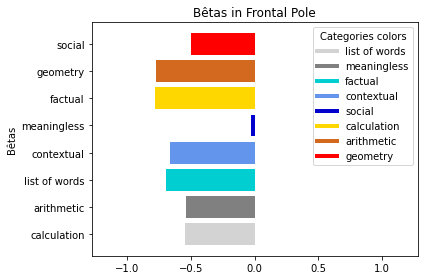

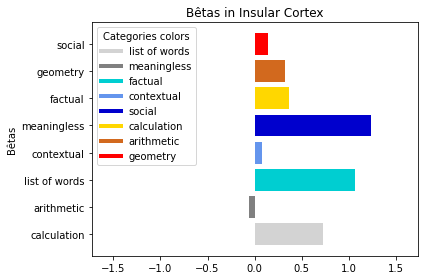

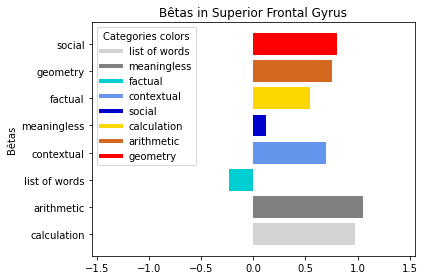

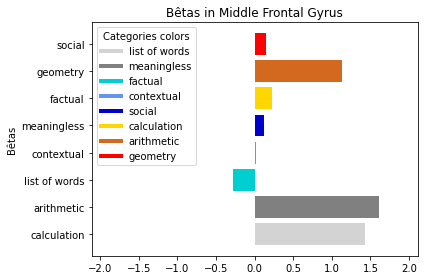

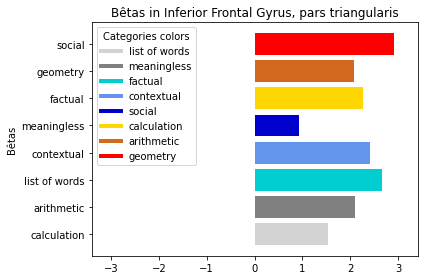

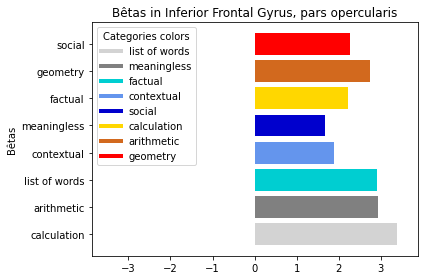

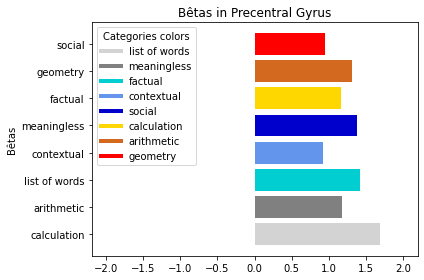

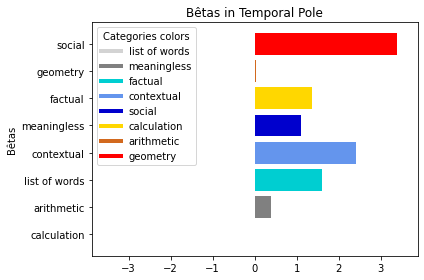

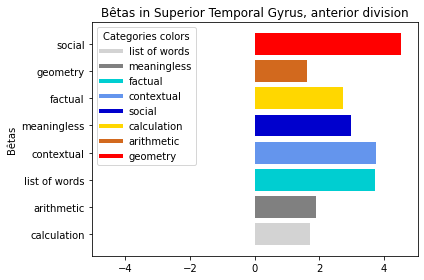

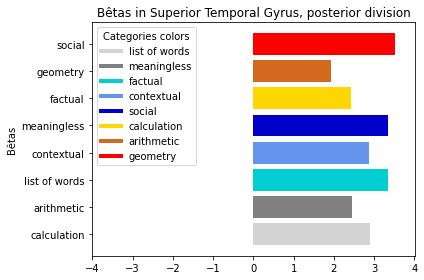

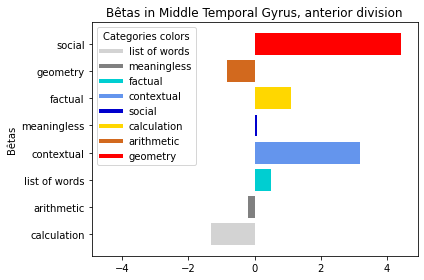

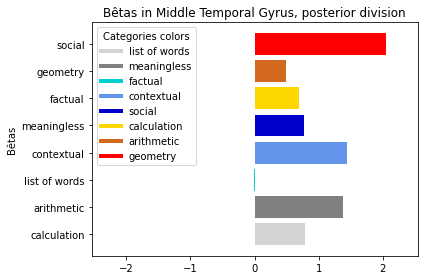

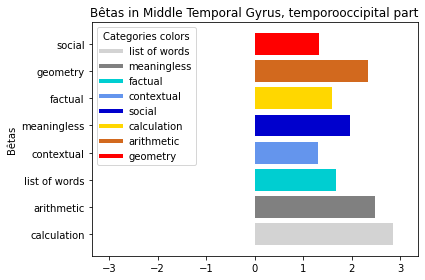

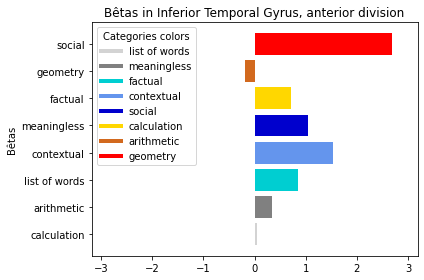

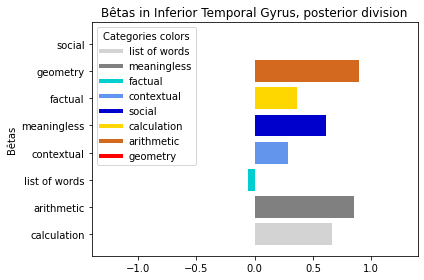

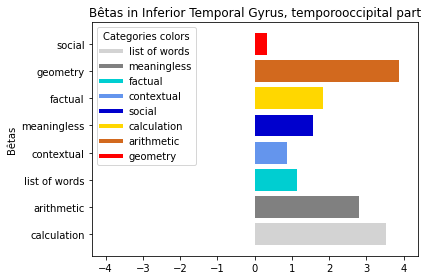

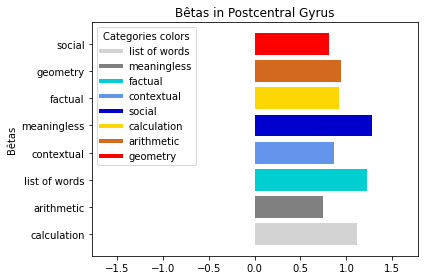

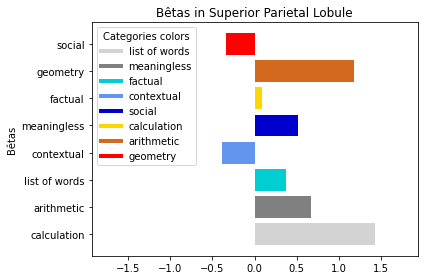

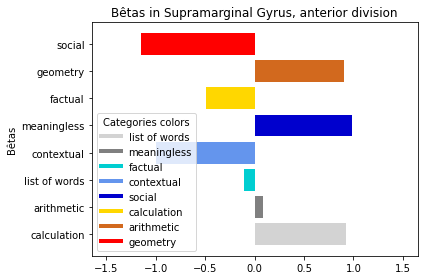

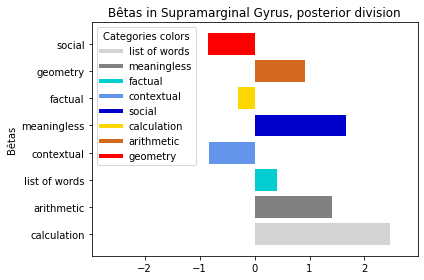

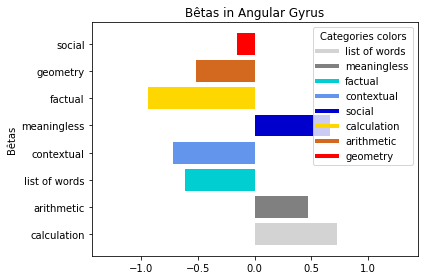

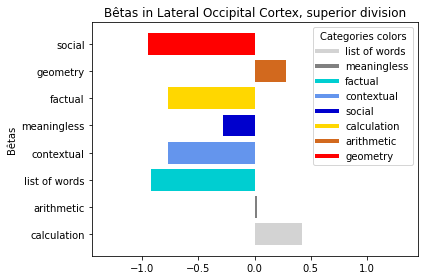

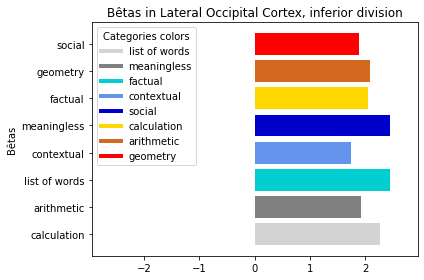

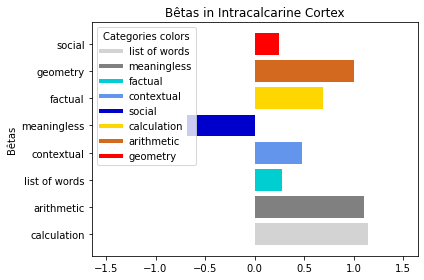

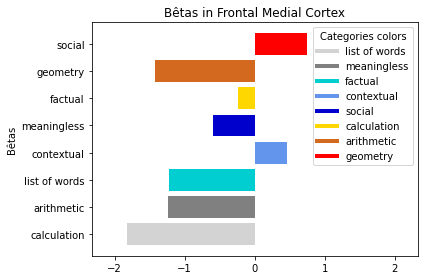

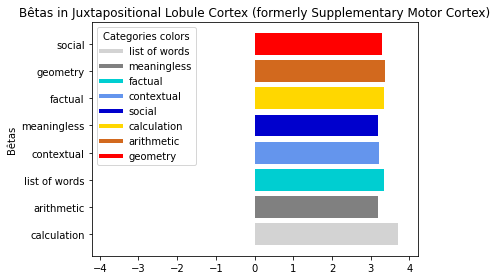

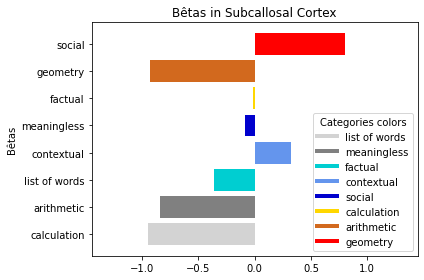

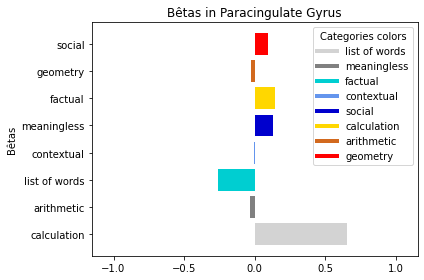

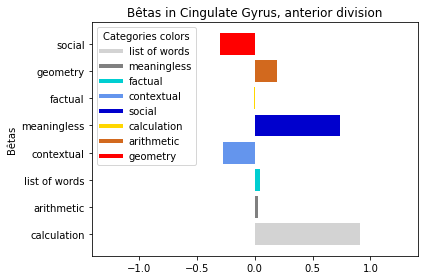

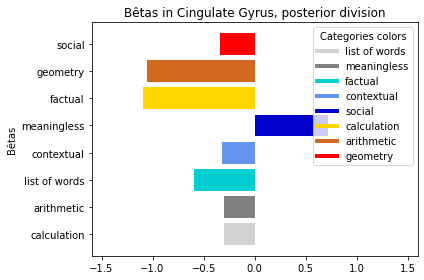

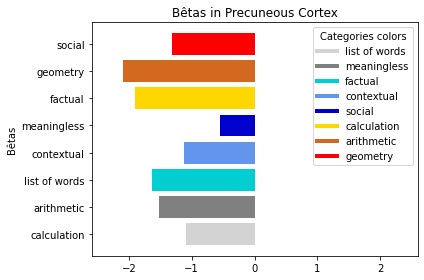

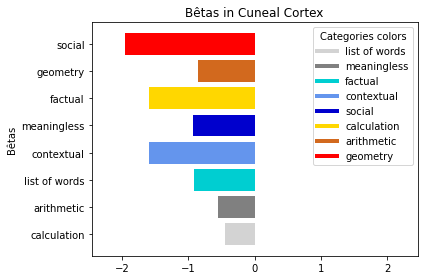

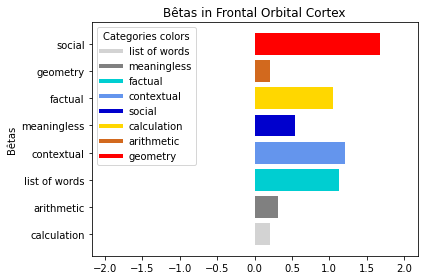

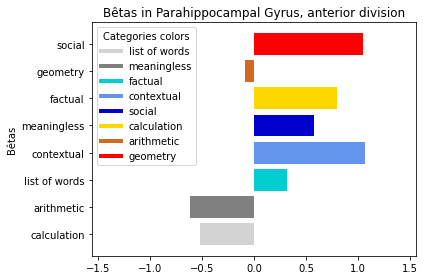

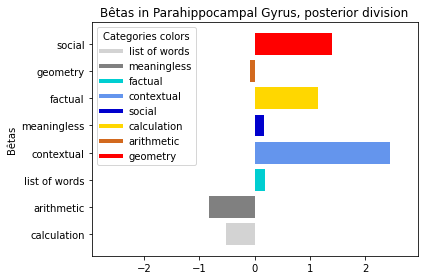

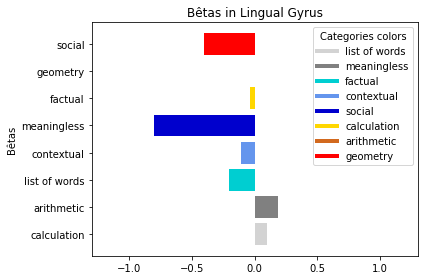

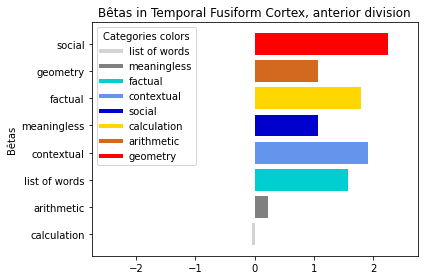

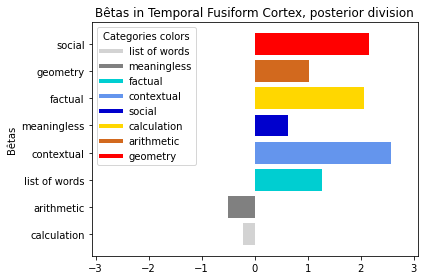

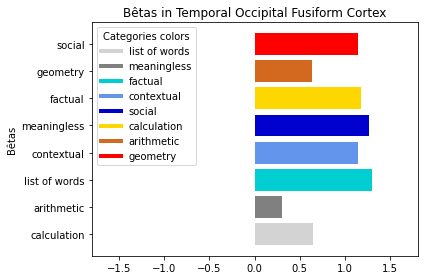

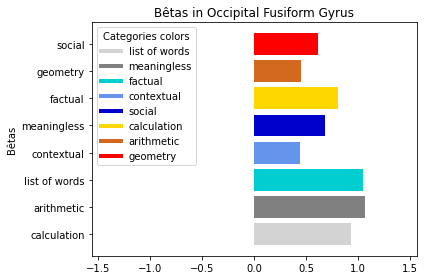

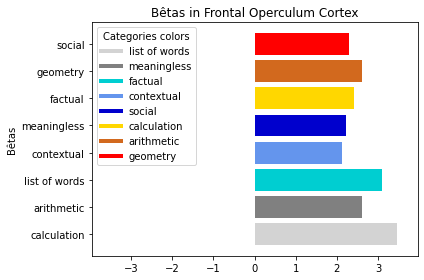

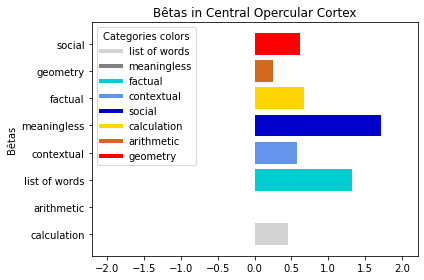

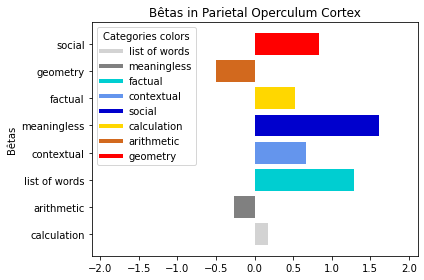

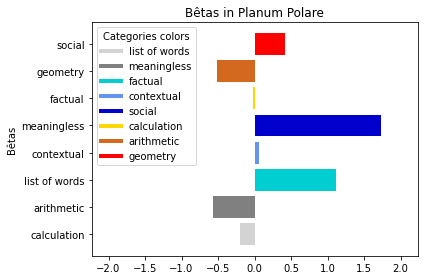

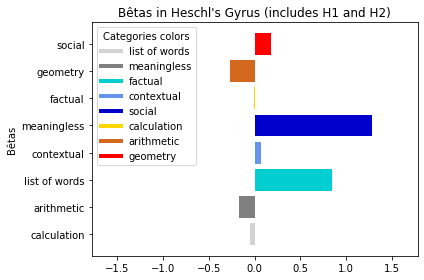

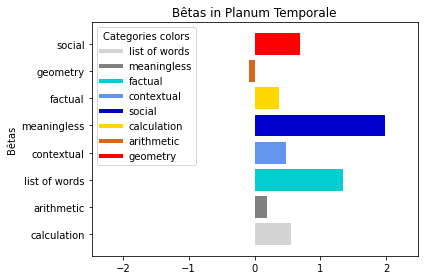

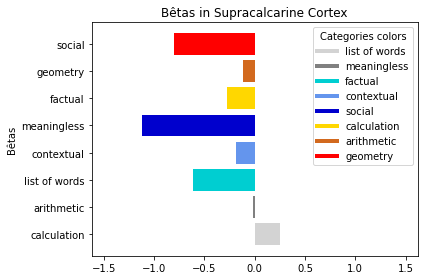

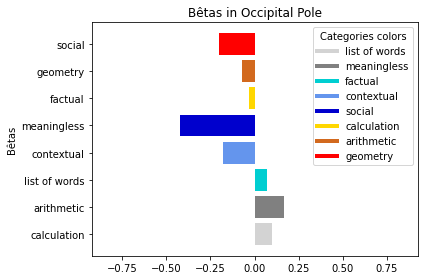

In [81]:
for roi in atlas['labels'][1:]:
    Beta_values = get_betas_in_ROIs(str(roi))

    fig, ax = plt.subplots()
    names = ['calculation', 'arithmetic', 'list of words', 'contextual', 'meaningless', 'factual', 'geometry', 'social']
    counts = [np.mean(Beta_values[0]), np.mean(Beta_values[1]), np.mean(Beta_values[2]), np.mean(Beta_values[3]), 
            np.mean(Beta_values[4]), np.mean(Beta_values[5]), np.mean(Beta_values[6]), np.mean(Beta_values[7])]
    xerr = [np.std(Beta_values[0]), np.std(Beta_values[1]), np.std(Beta_values[2]), np.std(Beta_values[3]), 
            np.std(Beta_values[4]), np.std(Beta_values[5]), np.std(Beta_values[6]), np.std(Beta_values[7])]
    custom_lines = [Line2D([0], [0], color='lightgrey', lw=4),
                    Line2D([0], [0], color='grey', lw=4),
                    Line2D([0], [0], color='darkturquoise', lw=4),
                    Line2D([0], [0], color='cornflowerblue', lw=4),
                    Line2D([0], [0], color='mediumblue', lw=4),
                    Line2D([0], [0], color='gold', lw=4),
                    Line2D([0], [0], color='chocolate', lw=4),
                    Line2D([0], [0], color='red', lw=4),
                    ]
    bar_labels = ['list of words', 'meaningless', 'factual', 'contextual', 'social', 'calculation', 'arithmetic', 'geometry']
    bar_colors_barplot = ['lightgrey','grey','darkturquoise','cornflowerblue','mediumblue','gold','chocolate','red']

    ax.barh(names, counts, label=bar_labels, color=bar_colors_barplot)
    ax.set_ylabel('Bêtas')
    ax.set_title(f'Bêtas in {roi}')
    ax.legend(custom_lines, bar_labels, title='Categories colors', loc='best')
    ax.set_xlim((-np.max([np.abs(np.min(counts)),np.max(counts)])-0.5,np.max([np.abs(np.min(counts)),np.max(counts)])+0.5))
    #fig.figsize = (15,10)
    plt.tight_layout()
    #plt.savefig(f'../results/ROI_analysis/Bêtas in {roi}.png')
    plt.show()
